
*   Name: Vismaya V
*   USN: 1AJ22EC055






*   Branch: Electronics & Communication Engineering
*   College Name: Cambridge Institute of Technology North Campus





*  Email Id: yadavvismaya@gmail.com




**Server response time prediction based on concurrent users and CPU load**

This project focuses on predicting server response time by analyzing how concurrent users and CPU load affect server performance.
By analyzing system performance data, the model helps identify how increased load affects response time.


In [1]:
!pip install gradio pandas numpy scikit-learn joblib



Import Libraries

In [2]:
import pandas as pd
import numpy as np
import gradio as gr
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, classification_report
)


Load Dataset

In [4]:
df = pd.read_csv("server_response_cleaned.csv")




In [5]:
df.shape

(1000, 15)

In [6]:
df.head()

,concurrent_users,cpu_utilization_percent,memory_utilization_percent,disk_io_operations,network_bandwidth_mbps,server_type,virtualization,database_queries_per_second,cache_hit_rate,server_age_months,operating_system,application_complexity,peak_hour_flag,background_processes,response_time_ms
0,971.0,57.629081,52.124425,940.607618,364.206563,Application,Container,18.890757,55.378511,14.961874,Windows,Complex,0.0,213.0,491.397098
1,4715.0,83.929089,69.023883,5924.288052,670.814511,Database,Physical,38.471198,76.723359,47.921654,Linux,Complex,0.0,231.0,159.308163
2,4377.0,29.783440,77.417857,768.262538,515.302147,Web,Physical,339.153358,84.147653,53.912896,Windows,Moderate,0.0,256.0,414.432085
3,2560.0,44.112779,73.102664,2518.672947,682.035603,File,VM,225.610622,75.597512,19.551583,Unix,Moderate,0.0,96.0,213.765498
4,2365.0,63.162867,81.144871,6042.002851,126.877698,Web,VM,458.237281,79.319993,19.414097,Windows,Moderate,1.0,492.0,491.397098


In [7]:
print(df.columns)


Index(['concurrent_users', 'cpu_utilization_percent',
       'memory_utilization_percent', 'disk_io_operations',
       'network_bandwidth_mbps', 'server_type', 'virtualization',
       'database_queries_per_second', 'cache_hit_rate', 'server_age_months',
       'operating_system', 'application_complexity', 'peak_hour_flag',
       'background_processes', 'response_time_ms'],
      dtype='object')


In [8]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   concurrent_users             1000 non-null   float64
 1   cpu_utilization_percent      1000 non-null   float64
 2   memory_utilization_percent   1000 non-null   float64
 3   disk_io_operations           1000 non-null   float64
 4   network_bandwidth_mbps       1000 non-null   float64
 5   server_type                  1000 non-null   object 
 6   virtualization               1000 non-null   object 
 7   database_queries_per_second  1000 non-null   float64
 8   cache_hit_rate               1000 non-null   float64
 9   server_age_months            1000 non-null   float64
 10  operating_system             1000 non-null   object 
 11  application_complexity       1000 non-null   object 
 12  peak_hour_flag               1000 non-null   float64
 13  background_processe

In [9]:
df.describe()

,concurrent_users,cpu_utilization_percent,memory_utilization_percent,disk_io_operations,network_bandwidth_mbps,database_queries_per_second,cache_hit_rate,server_age_months,peak_hour_flag,background_processes,response_time_ms
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2540.046000,57.318884,63.815814,4975.594591,518.407603,257.885579,75.328445,31.243950,0.289000,274.160000,494.738805
std,1378.903183,20.624220,19.103364,2736.981561,277.402727,142.070898,13.740809,16.510978,0.453525,128.229479,271.119521
min,30.000000,20.187841,30.009676,102.496782,10.767416,10.555192,50.004954,1.021889,0.000000,50.000000,10.402453
25%,1369.750000,39.821566,48.196869,2667.778342,297.403523,137.863557,64.134966,17.803204,0.000000,162.750000,270.773508
50%,2560.000000,57.629081,63.829456,5110.726588,520.376348,256.125983,75.767548,31.791327,0.000000,269.000000,491.397098
75%,3749.750000,73.950526,78.917768,7202.308423,751.740856,386.474395,87.534703,44.823301,1.000000,386.000000,714.273811
max,4990.000000,94.995288,97.981335,9987.040894,997.471360,499.168533,98.990878,59.831252,1.000000,499.000000,999.769352


EDA (Exploratory Data Analysis)

In [10]:
# Missing Values Checks if any column has missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 concurrent_users               0
cpu_utilization_percent        0
memory_utilization_percent     0
disk_io_operations             0
network_bandwidth_mbps         0
server_type                    0
virtualization                 0
database_queries_per_second    0
cache_hit_rate                 0
server_age_months              0
operating_system               0
application_complexity         0
peak_hour_flag                 0
background_processes           0
response_time_ms               0
dtype: int64


In [11]:
# Data Types

print("\nData Types:\n", df.dtypes)


Data Types:
 concurrent_users               float64
cpu_utilization_percent        float64
memory_utilization_percent     float64
disk_io_operations             float64
network_bandwidth_mbps         float64
server_type                     object
virtualization                  object
database_queries_per_second    float64
cache_hit_rate                 float64
server_age_months              float64
operating_system                object
application_complexity          object
peak_hour_flag                 float64
background_processes           float64
response_time_ms               float64
dtype: object


 Histogram Visualization

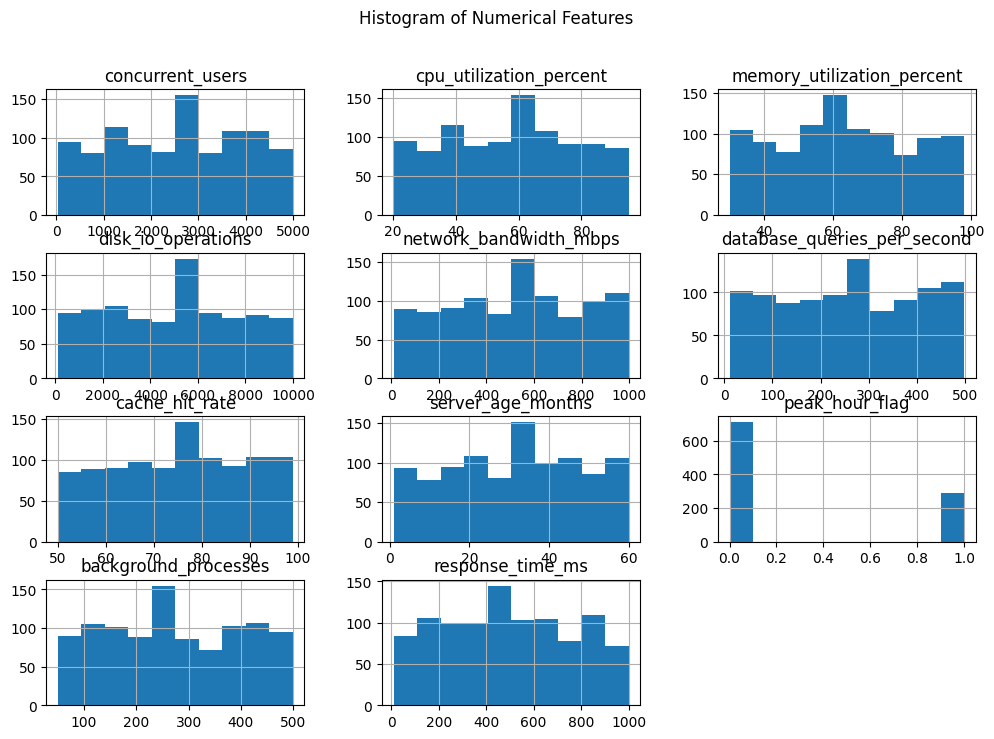

In [12]:
#Understand how data is spread.
#Shows frequency of values
df.hist(figsize=(12,8))
plt.suptitle("Histogram of Numerical Features")
plt.show()
                                        #Check if data is normally distributed and identify skewness

 Scatter Plot Visualization

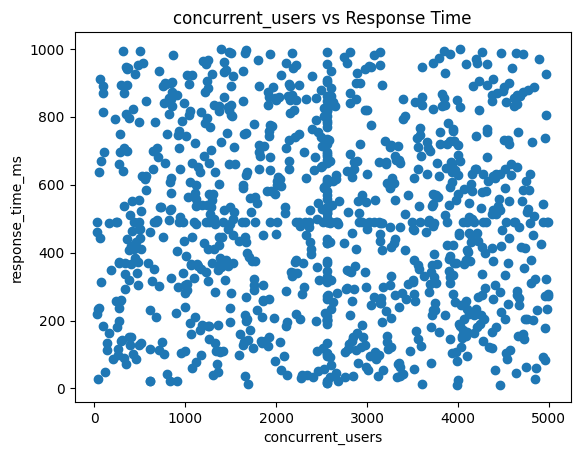

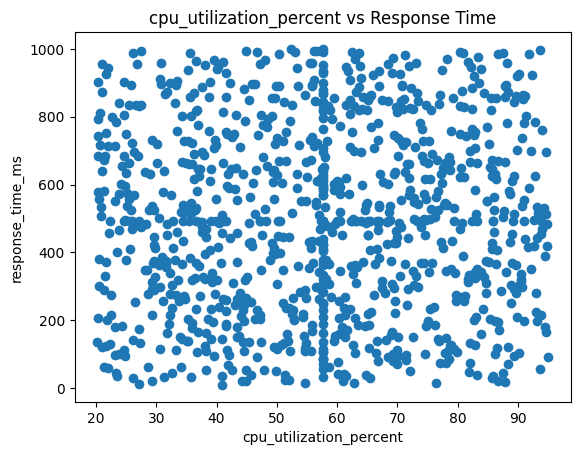

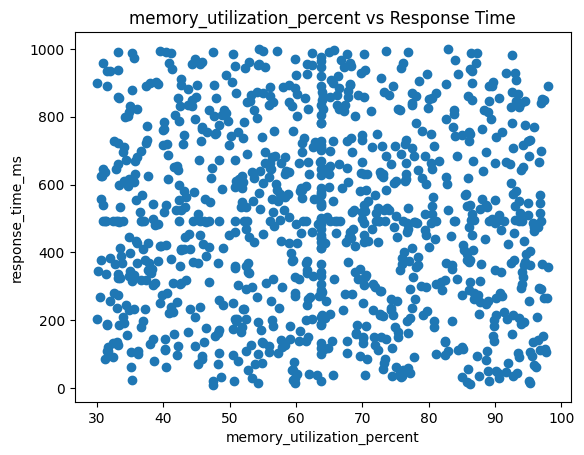

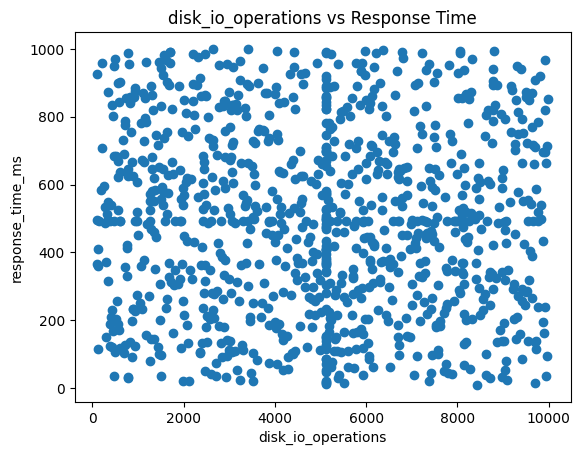

In [13]:
#It shows the relation between feature and the response time
num_cols = df.select_dtypes(include=np.number).columns[:4]

for col in num_cols:
    plt.figure()
    plt.scatter(df[col], df['response_time_ms'])
    plt.xlabel(col)
    plt.ylabel("response_time_ms")
    plt.title(f"{col} vs Response Time")
    plt.show()

Correlation Heatmap

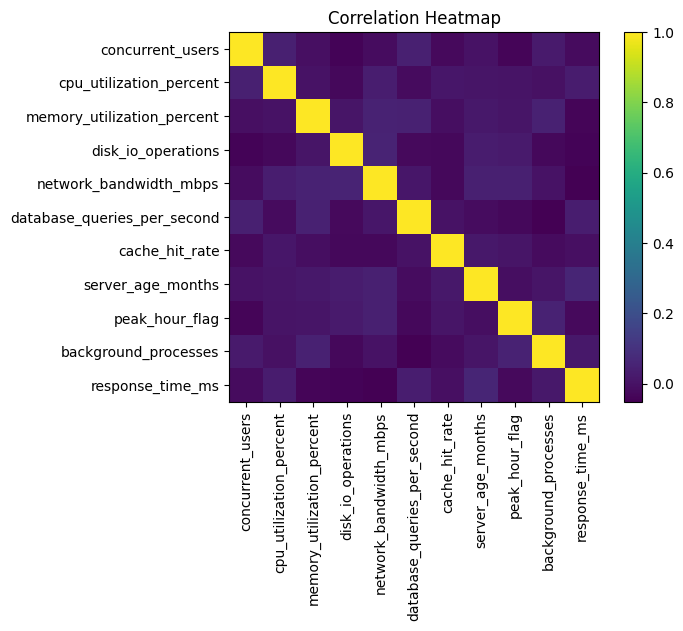

In [14]:
#shows the relationship between system parameters and server response time.
corr = df.select_dtypes(include=np.number).corr()
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


 Feature & Target Split

In [15]:
#separated features and target for regression
X = df.drop(columns=['response_time_ms'])
y = df['response_time_ms']
#created a binary classification label to identify slow and fast servers based on median response time.
df['slow_server'] = (df['response_time_ms'] > df['response_time_ms'].median()).astype(int)
y_class = df['slow_server']

COLUMN TYPES

In [16]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns
#It separates categorical features and numerical features from the dataset for proper preprocessing


 PREPROCESSOR

In [17]:
#The preprocessor changes all the data into numbers
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

MODEL

In [18]:
#The model learns from the data and predicts the server response time
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

 Preprocessing Pipeline

In [19]:
#creates a preprocessing pipeline that categorical features and standardizes numerical features before model training.

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])





Train the model

In [20]:
#Training the model means teaching the model using the data so it can make predictions
pipeline.fit(X, y)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['server_type', 'virtualization', 'operating_system',
       'application_complexity'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['concurrent_users', 'cpu_utilization_percent',
       'memory_utilization_percent', 'disk_io_operations',
       'network_bandwidth_mbps', 'database_queries_per_second',
       'cache_hit_rate', 'server_age_months', 'peak_hour_flag',
       'background_processes'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

**REGRESSION MODELS**

In [21]:
#used to predict the exact server response time based on system load parameters
reg_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

reg_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", reg_model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

reg_pipeline.fit(X_train, y_train)
y_pred = reg_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("\nREGRESSION RESULTS")
print("RMSE:", rmse) #Root Mean Squared Error
print("MAE :", mae) #Mean Absolute Error
print("R2  :", r2) #R-Squared Score




REGRESSION RESULTS
RMSE: 270.9057686254979
MAE : 230.17412943641062
R2  : -0.08027196542110437


**CLASSIFICATION MODELS**

In [22]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

print("\n===== CLASSIFICATION RESULTS =====")

# Define y_train_class and y_test_class using the indices from the regression split
y_train_class = y_class.loc[X_train.index]
y_test_class = y_class.loc[X_test.index]

for name, model in classification_models.items():

    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train_class)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test_class, y_pred)

    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test_class, y_pred))


===== CLASSIFICATION RESULTS =====

Logistic Regression
Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.44      0.58      0.50        96
           1       0.46      0.33      0.38       104

    accuracy                           0.45       200
   macro avg       0.45      0.46      0.44       200
weighted avg       0.45      0.45      0.44       200


Decision Tree Classifier
Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.45      0.48      0.46        96
           1       0.49      0.46      0.48       104

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200


Random Forest Classifier
Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        96
           1       0.50      0.28      0.36       104

    accuracy                

Feature Importance

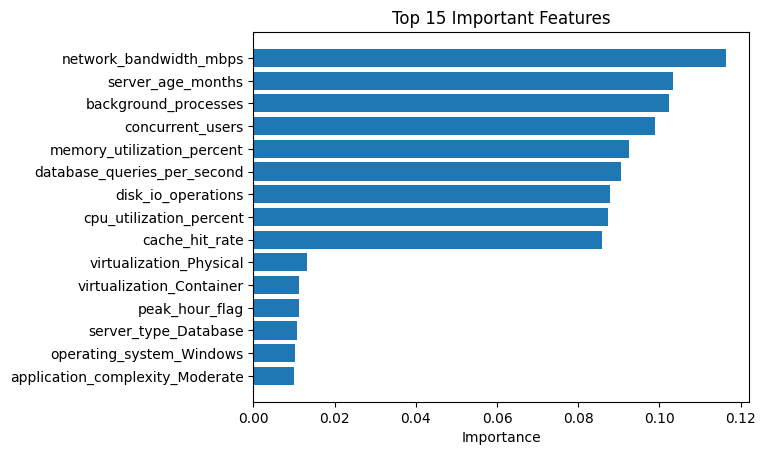

In [23]:
#Feature importance ranks input features based on their contribution to the model’s predictions.
rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(n_estimators=300))
])

rf_pipeline.fit(X_train, y_train)

encoded_features = rf_pipeline.named_steps['prep'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_cols)

all_features = np.concatenate([encoded_features, numerical_cols])

importances = rf_pipeline.named_steps['model'].feature_importances_

top_idx = np.argsort(importances)[-15:]

plt.figure()
plt.barh(all_features[top_idx], importances[top_idx])
plt.title("Top 15 Important Features")
plt.xlabel("Importance")
plt.show()
#Server response time is mainly driven by CPU utilization and user load

Bar Graph: Fast vs Slow Server Count

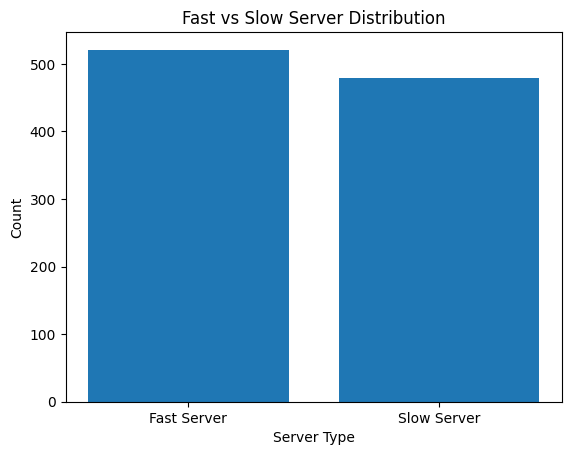

In [24]:
class_counts = df['slow_server'].value_counts()

plt.figure()
plt.bar(['Fast Server', 'Slow Server'], class_counts.values)
plt.xlabel("Server Type")
plt.ylabel("Count")
plt.title("Fast vs Slow Server Distribution")
plt.show()
#The bar graph visualizes how many samples belong to each server class


Bar Graph: Classification Model Accuracy Comparison

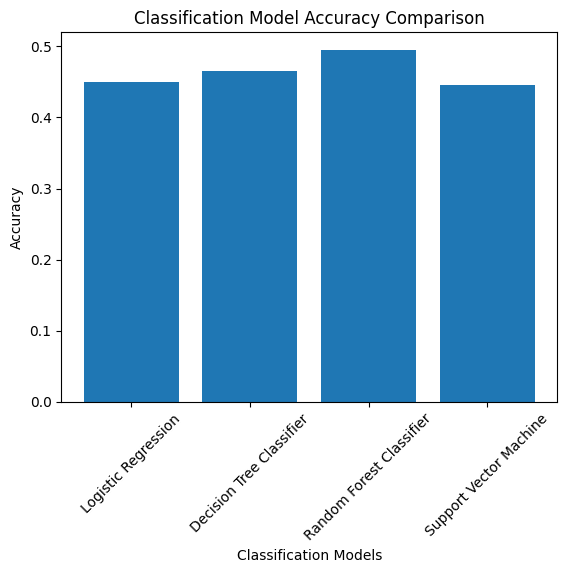

In [25]:
#Classification model accuracy comparison helps identify the most accurate model for predicting server performance classes
model_names = []
accuracies = []

for name, model in classification_models.items():
    clf_pipeline = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    clf_pipeline.fit(X_train, y_class.loc[X_train.index])
    y_pred_class = clf_pipeline.predict(X_test)

    acc = accuracy_score(y_class.loc[X_test.index], y_pred_class)

    model_names.append(name)
    accuracies.append(acc)


plt.figure()
plt.bar(model_names, accuracies)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Classification Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()


Box Plot: Overall Response Time Distribution

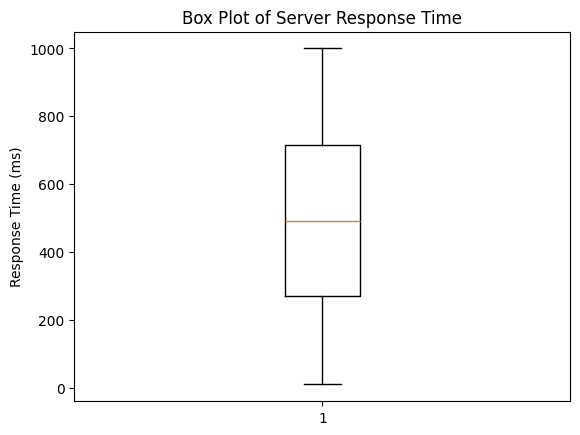

In [26]:
# visualizes the distribution, central tendency, and outliers of server response time
plt.figure()
plt.boxplot(df['response_time_ms'])
plt.ylabel("Response Time (ms)")
plt.title("Box Plot of Server Response Time")
plt.show()


Box Plot: Fast vs Slow Server Comparison

/tmp/ipython-input-3612229955.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


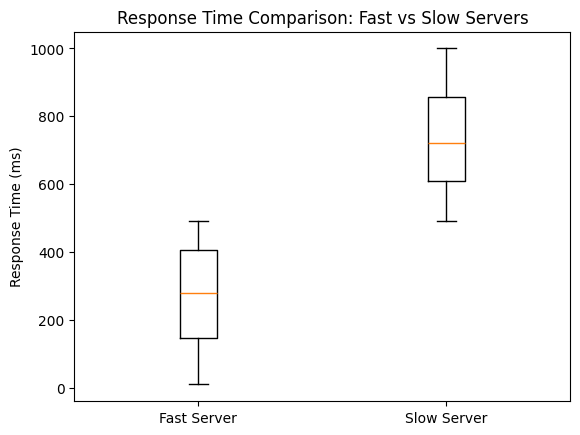

In [27]:
# Box plot comparing fast and slow servers
plt.figure()
plt.boxplot(
    [df[df['slow_server'] == 0]['response_time_ms'],
     df[df['slow_server'] == 1]['response_time_ms']],
    labels=['Fast Server', 'Slow Server']
)
plt.ylabel("Response Time (ms)")
plt.title("Response Time Comparison: Fast vs Slow Servers")
plt.show()






Create Gradio App

In [28]:

# PREDICTION FUNCTION
def predict_response_time(
    concurrent_users,
    cpu_utilization_percent,
    memory_utilization_percent,
    disk_io_operations,
    network_bandwidth_mbps,
    server_type,
    virtualization,
    database_queries_per_second,
    cache_hit_rate,
    server_age_months,
    operating_system,
    application_complexity,
    peak_hour_flag,
    background_processes
):
    input_df = pd.DataFrame([{
        'concurrent_users': concurrent_users,
        'cpu_utilization_percent': cpu_utilization_percent,
        'memory_utilization_percent': memory_utilization_percent,
        'disk_io_operations': disk_io_operations,
        'network_bandwidth_mbps': network_bandwidth_mbps,
        'server_type': server_type,
        'virtualization': virtualization,
        'database_queries_per_second': database_queries_per_second,
        'cache_hit_rate': cache_hit_rate,
        'server_age_months': server_age_months,
        'operating_system': operating_system,
        'application_complexity': application_complexity,
        'peak_hour_flag': peak_hour_flag,
        'background_processes': background_processes
    }])

    prediction = pipeline.predict(input_df)
    return f"{prediction[0]:.2f} ms"


# GRADIO WEB APP

interface = gr.Interface(
    fn=predict_response_time,
    inputs=[
        gr.Number(label="Concurrent Users"),
        gr.Number(label="CPU Utilization (%)"),
        gr.Number(label="Memory Utilization (%)"),
        gr.Number(label="Disk IO Operations"),
        gr.Number(label="Network Bandwidth (Mbps)"),
        gr.Dropdown(df['server_type'].unique().tolist(), label="Server Type"),
        gr.Dropdown(df['virtualization'].unique().tolist(), label="Virtualization"),
        gr.Number(label="DB Queries per Second"),
        gr.Number(label="Cache Hit Rate (%)"),
        gr.Number(label="Server Age (Months)"),
        gr.Dropdown(df['operating_system'].unique().tolist(), label="Operating System"),
        gr.Dropdown(df['application_complexity'].unique().tolist(), label="Application Complexity"),
        gr.Number(label="Peak Hour (0 = No, 1 = Yes)"),
        gr.Number(label="Background Processes")
    ],
    outputs=gr.Textbox(label="Predicted Response Time (ms)"),
    title="Server Response Time Prediction",
    description="Predict server response time using all system, workload, and configuration parameters"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d02e914b3ff064fb25.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
